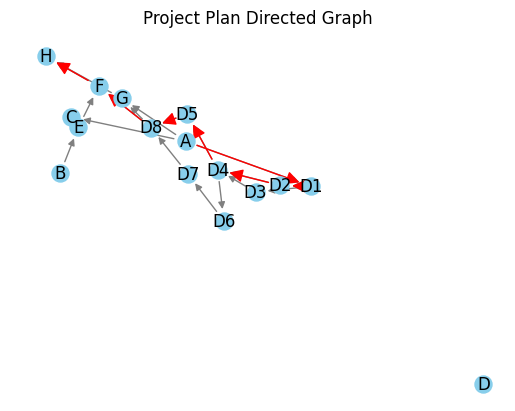

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define your tasks and dependencies
tasks = {
    'A': [], 'B': [], 'C': ['A'], 'D': [], 'D1': ['A'], 'D2': ['D1'],
    'D3': ['D1'], 'D4': ['D2', 'D3'], 'D5': ['D4'], 'D6': ['D4'],
    'D7': ['D6'], 'D8': ['D5', 'D7'], 'E': ['B', 'C'], 'F': ['D8', 'E'],
    'G': ['A', 'D8'], 'H': ['F', 'G']
}

# Define the critical path
critical_path = ['A', 'D1', 'D2', 'D4', 'D5', 'D8', 'F', 'H']

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for task, dependencies in tasks.items():
    G.add_node(task)
    for dependency in dependencies:
        G.add_edge(dependency, task)

# Specify the layout of the graph
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=150)

# Draw the edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='-|>', arrowsize=10)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Highlight the critical path by generating a correct list of edges
critical_edges = [(dep, task) for task in critical_path for dep in tasks[task] if dep in critical_path]
nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color='red', arrowstyle='-|>', arrowsize=20)

# Set plot title and show the graph
plt.title('Project Plan Directed Graph')
plt.axis('off')  # Turn off the axis
plt.show()
